In [6]:
# Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
# Contribuição: Adriano Santos

# Deep Learning

## Instalação das Bibliotecas de Python

Este código utiliza bibliotecas de Python, como Matplotlib e Keras, para criar e treinar uma rede neural. Ele importa dados do conjunto de dados MNIST, que contém imagens de dígitos escritos à mão. Em seguida, ele define uma rede neural com camadas densas e dropout para o treinamento. O objetivo é aprender a classificar os dígitos corretamente. Por fim, o código utiliza métricas de avaliação, como matriz de confusão, para verificar o desempenho do modelo. Certifique-se de ter instalado a biblioteca TensorFlow antes de executar este código.

In [8]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
# Você pode substituir a linha from keras.utils import np_utils por from keras.utils import to_categorical
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

# Para instalar o TensorFlow, execute no Anaconda Prompt se precisar:
# pip install tensorflow

## Mostrando Imagem do Conjunto de Dados MNIST

Este código é usado para mostrar uma imagem do conjunto de dados MNIST, que contém dígitos escritos à mão. Primeiro, ele carrega os dados e os divide em conjuntos de treinamento e teste. Em seguida, exibe uma imagem específica do conjunto de treinamento (no caso, a imagem número 21) em escala de cinza e adiciona um título indicando a classe (número) correspondente à imagem, tornando a legenda mais compreensível.

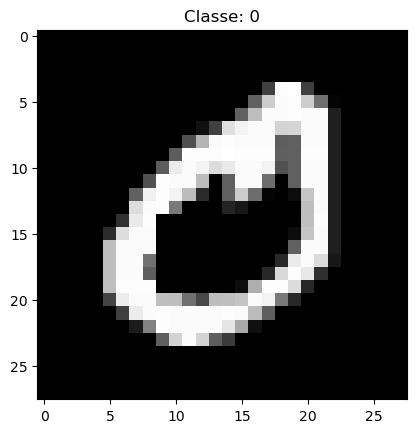

In [13]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

# Visualização de uma imagem específica
plt.imshow(X_treinamento[21], cmap='gray')
plt.title(f"Classe: {y_treinamento[21]}") 
plt.show()

## Ajustando a Forma dos Conjuntos de Dados

Nesse código, estamos ajustando a forma dos conjuntos de dados de treinamento e teste (X_treinamento e X_teste) para que cada imagem, originalmente com dimensões diferentes, agora tenha 784 valores. Isso é necessário para que possamos usar esses dados em um modelo de aprendizado de máquina que espera uma entrada consistente. A linha final (X_teste[0]) mostra a primeira imagem após essa transformação.

In [16]:
# Mudando a dimensão de X_treinamento e X_teste para 784

X_treinamento = X_treinamento.reshape(-1, 784)
X_teste = X_teste.reshape(-1, 784)
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

## Convertendo os Dados Para o Tipo 'float32' 

Nesse trecho de código, estamos convertendo os dados do conjunto de treinamento (X_treinamento) e do conjunto de teste (X_teste) para o tipo 'float32', que é um formato de número decimal com menos precisão do que outros tipos, como 'float64'. Isso pode ser útil em algumas situações, economizando espaço de memória, especialmente quando estamos lidando com grandes conjuntos de dados, tornando o código mais eficiente e rápido ao executar operações numéricas.

In [17]:
# Transformação dos dados para float para podermos normalizar os dados

X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

## Normalizando os Dados Atuais em Dados de Imagens

No código acima, estamos realizando um processo chamado normalização em dados de imagens. O valor máximo que um pixel pode ter em uma imagem é 255. Portanto, ao dividir os dados de treinamento e teste por 255, estamos transformando todos os valores dos pixels para um intervalo de 0 a 1. Isso ajuda o modelo a aprender de maneira mais eficaz, pois os números menores facilitam o processo de treinamento, tornando-o mais rápido e preciso.

In [18]:
# Normalização (255 é o valor máximo de um pixel)

X_treinamento /= 255
X_teste /= 255

## Convertendo os Dados Para o Formato "one-hot encoding"

Nesse código, estamos realizando uma transformação nos dados de treinamento e teste. A linha "y_treinamento = to_categorical(y_treinamento, 10)" converte os rótulos de treinamento em um formato especial chamado de "one-hot encoding," que é útil em tarefas de classificação com 10 categorias possíveis. O mesmo é feito para os rótulos de teste na linha seguinte. Por fim, "y_teste[0]" simplesmente nos mostra o primeiro rótulo de teste após essa conversão, representado como um vetor binário que indica a categoria à qual pertence.

In [27]:
# Transformação para o formato dummy (temos 10 classes)

y_treinamento = to_categorical(y_treinamento, 10)
y_teste = to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Definindo a Estrutura da Rede Neural

Este código cria uma rede neural para classificação de dados. A rede tem uma camada de entrada com 784 neurônios, seguida por três camadas ocultas, cada uma com 64 neurônios e uma função de ativação chamada ReLU. O Dropout é usado para evitar que a rede memorize demais os dados. Finalmente, há uma camada de saída com 10 neurônios e uma função de ativação softmax para classificar os dados em 10 categorias diferentes. O código não mostra a compilação do modelo, mas fornece um resumo das camadas e neurônios usados na rede.

In [31]:
# Entrada: 784 - Camadas ocultas: 64, 64, 64 - Saída: 10 (para classificação)
modelo = Sequential()

# Camada de entrada
modelo.add(Dense(units=64, activation='relu', input_dim=784))
modelo.add(Dropout(0.2))  # Dropout para evitar overfitting

# Três camadas ocultas idênticas
for _ in range(3):
    modelo.add(Dense(units=64, activation='relu'))
    modelo.add(Dropout(0.2))  # Dropout em cada camada oculta

# Camada de saída com ativação softmax para classificação
modelo.add(Dense(units=10, activation='softmax'))

# Resumo do modelo
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                50240     
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         


                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 10)                650       
                                                                 
Total params: 63370 (247.54 KB)
Trainable params: 63370 (247.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Configurando e Treinando Rede Neural

Nesse código, estamos configurando e treinando uma rede neural. A primeira linha define como a rede neural será treinada, especificando que usaremos o otimizador 'adam' para ajustar os parâmetros da rede, a função de perda 'categorical_crossentropy' para medir o quão bem a rede está aprendendo e métricas para acompanhar o desempenho. A segunda parte do código executa o treinamento real da rede, onde 'X_treinamento' e 'y_treinamento' são os dados de treinamento, 'epochs=20' indica que a rede será treinada por 20 épocas, e 'validation_data=(X_teste, y_teste)' usa dados de teste para avaliar o desempenho durante o treinamento.

In [36]:
# Configuração dos parâmetros da rede neural
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinamento da rede neural
historico = modelo.fit(
    X_treinamento, y_treinamento, epochs=20, validation_data=(X_teste, y_teste)
)

Epoch 1/20
1875/1875 [==============================] - 48s 17ms/step - loss: 0.0819 - accuracy: 0.9778 - val_loss: 0.1005 - val_accuracy: 0.9752
Epoch 2/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0824 - accuracy: 0.9761 - val_loss: 0.1050 - val_accuracy: 0.9766
Epoch 3/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0810 - accuracy: 0.9769 - val_loss: 0.0994 - val_accuracy: 0.9776
Epoch 4/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0816 - accuracy: 0.9766 - val_loss: 0.1047 - val_accuracy: 0.9764
Epoch 5/20
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0800 - accuracy: 0.9771 - val_loss: 0.1017 - val_accuracy: 0.9763
Epoch 6/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0762 - accuracy: 0.9782 - val_loss: 0.1019 - val_accuracy: 0.9754
Epoch 7/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0760 - accuracy: 0.9781 - val_loss: 0.1008 -

## Criando Gráfico Simples para Mostrar Desempenho da Rede Neural

Esse código é usado para criar um gráfico simples que ajuda a entender o desempenho de uma rede neural. Os dois gráficos mostram como o erro (representado em azul) e a precisão (representada em outra cor) da rede mudam ao longo do treinamento. Isso é útil para avaliar o quão bem a rede está aprendendo com os dados; se o erro está diminuindo e a precisão está aumentando, é um sinal de que a rede está progredindo. É uma ferramenta visual para acompanhar o treinamento de redes neurais.

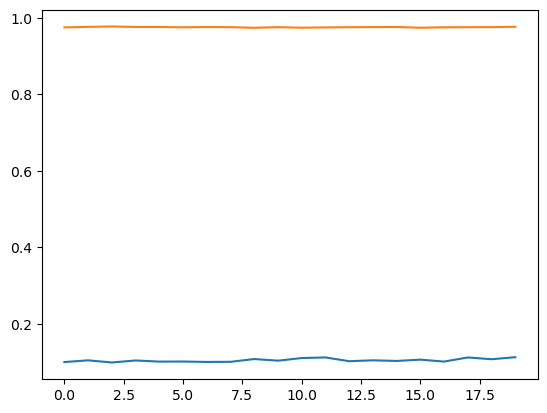

In [37]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()

# Evolução do erro, azul
plt.plot(historico.history['val_loss'])

# Performance da rede
plt.plot(historico.history['val_accuracy'])

## Realizando Previsões Usando Modelo de Aprendizado de Máquina

Esse código realiza previsões usando um modelo de aprendizado de máquina. Ele alimenta o modelo com um conjunto de dados chamado X_teste e, em seguida, obtém as previsões resultantes, armazenando-as na variável 'previsoes'. Basicamente, o código utiliza o modelo treinado para fazer estimativas com base nos dados de teste, e as respostas previstas são armazenadas na variável 'previsoes'.

In [50]:
# Obtenção das previsões 
previsoes = modelo.predict(X_teste)
print(previsoes)

313/313 [==============================] - 15s 3ms/step
[[5.6940502e-15 1.0019036e-11 3.4074064e-09 ... 1.0000000e+00
  2.9699887e-15 3.5238486e-08]
 [4.3765494e-16 9.3749336e-14 1.0000000e+00 ... 3.8928232e-15
  4.5003946e-16 7.7710650e-23]
 [6.6121334e-19 1.0000000e+00 3.6256480e-14 ... 4.5523703e-11
  1.3809929e-09 4.5462737e-17]
 ...
 [1.7734190e-17 2.8376150e-17 3.1764470e-12 ... 1.9332289e-14
  5.4437808e-14 3.2812610e-09]
 [1.8517438e-21 9.3810405e-20 1.0305720e-21 ... 2.6189531e-18
  3.8459277e-16 1.3389066e-18]
 [1.5852876e-15 2.1675935e-21 4.0621011e-20 ... 3.1497965e-32
  7.5489355e-18 2.7900824e-27]]


## Convertendo as Previsões em Classes Previstas

Neste código, estamos convertendo as previsões e os valores reais do teste em classes previstas, o que é útil para avaliar o desempenho de um modelo de machine learning. Em seguida, calculamos a matriz de confusão, que nos mostra como as previsões se comparam aos valores reais. Por fim, exibimos essa matriz de confusão na saída, permitindo uma análise visual de quão bem o modelo está classificando os dados. A matriz de confusão é uma ferramenta importante para entender a precisão de um modelo de classificação.

In [51]:
# Transforma os valores de y_teste e previsoes para suas classes previstas
y_teste_classes = [np.argmax(classe) for classe in y_teste]
y_previsoes_classes = [np.argmax(classe) for classe in previsoes]

# Calcula a matriz de confusão
matriz_confusao = confusion_matrix(y_teste_classes, y_previsoes_classes)

# Exibe a matriz de confusão
print("Matriz de Confusão:")
print(matriz_confusao)


Matriz de Confusão:
[[ 968    1    2    0    0    3    2    1    3    0]
 [   0 1127    0    2    0    1    2    1    2    0]
 [   2    0 1011    5    2    1    1    5    5    0]
 [   0    0    9  985    0    8    0    5    3    0]
 [   1    0    1    0  959    0    5    2    1   13]
 [   3    1    0   12    1  868    3    1    2    1]
 [   2    3    0    1    4    6  940    0    2    0]
 [   0    2    5    2    0    0    0 1014    1    4]
 [   4    2    3    9    4   10    1    5  932    4]
 [   0    3    0    7   12   10    1    9    3  964]]


## Fazendo Previsão Usando Novo Registro

Neste código abaixo, estamos fazendo uma previsão usando um novo registro que é o quarto item do nosso conjunto de treinamento. A variável 'previsao_registro_4' guarda o valor correspondente a esse registro no conjunto de treinamento. Em seguida, usamos 'print' para mostrar esse valor na tela. Basicamente, estamos extraindo e exibindo o valor associado ao quarto item do nosso conjunto de treinamento.

In [52]:
# Realizando previsão com um novo registro
# Registro número 4 do conjunto de treinamento

previsao_registro_4 = y_treinamento[20]
print(previsao_registro_4)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## Usando Modelo de Machine Learning ao Fazer Previsão

Neste código simples, estamos usando um modelo de machine learning para fazer uma previsão. Primeiro, selecionamos um exemplo de entrada dos nossos dados de treinamento na posição 20. Em seguida, transformamos essa entrada de uma matriz em um vetor. Depois, fazemos a previsão usando o modelo e identificamos a classe com a maior probabilidade de ser a correta. Por fim, exibimos o número da classe prevista. Basicamente, estamos usando o modelo para dizer qual categoria esse exemplo de entrada pertence.

In [53]:
# Passo a mesma posição para o modelo prever
entrada = X_treinamento[20]

# Converto de matriz para vetor
entrada = np.expand_dims(entrada, axis=0)

# Realizo a previsão
previsao = modelo.predict(entrada)

# Obtém o índice da classe com maior valor de previsão
classe_predita = np.argmax(previsao)

# Exibo a classe prevista
print(classe_predita)

1/1 [==============================] - 13s 13s/step
4
